In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [6]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Bugis/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

BUGINESE_LETTER_RA.png 6768834
BUGINESE_LETTER_PA.png 8314839
BUGINESE_LETTER_NYCA.png 11271723
BUGINESE_LETTER_NYA.png 9997590
BUGINESE_LETTER_NRA.png 10040631
BUGINESE_LETTER_NGKA.png 6386091
BUGINESE_LETTER_NGA.png 4888617
BUGINESE_LETTER_NA.png 6674052
BUGINESE_LETTER_MPA.png 8135763
BUGINESE_LETTER_MA.png 5856981
BUGINESE_LETTER_LA.png 9286089
BUGINESE_LETTER_KA.png 6024453
BUGINESE_LETTER_JA.png 6917340
BUGINESE_LETTER_HA.png 11550903
BUGINESE_LETTER_GA.png 9160284
BUGINESE_LETTER_DA.png 6688746
BUGINESE_LETTER_CA.png 10249845
BUGINESE_LETTER_BA.png 7536522
BUGINESE_LETTER_A.png 8845977
BUGINESE_END_OF_SECTION.png 5803440
BUGINESE_VOWEL_SIGN_U.png 419467
BUGINESE_VOWEL_SIGN_O.png 3993507
BUGINESE_VOWEL_SIGN_I.png 485535
BUGINESE_VOWEL_SIGN_E.png 3248067
BUGINESE_VOWEL_SIGN_AE.png 732747
BUGINESE_PALLAWA.png 2495931
BUGINESE_LETTER_YA.png 9677991
BUGINESE_LETTER_VA.png 8014425
BUGINESE_LETTER_TA.png 5842269
BUGINESE_LETTER_SA.png 5979270


In [4]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [10]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Bugis/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

BUGINESE_LETTER_RA.png 6762354
BUGINESE_LETTER_PA.png 8310399
BUGINESE_LETTER_NYCA.png 11254875
BUGINESE_LETTER_NYA.png 9985188
BUGINESE_LETTER_NRA.png 10036308
BUGINESE_LETTER_NGKA.png 6377559
BUGINESE_LETTER_NGA.png 4884018
BUGINESE_LETTER_NA.png 6664494
BUGINESE_LETTER_MPA.png 8128479
BUGINESE_LETTER_MA.png 5844741
BUGINESE_LETTER_LA.png 9280179
BUGINESE_LETTER_KA.png 6020571
BUGINESE_LETTER_JA.png 6907770
BUGINESE_LETTER_HA.png 11535285
BUGINESE_LETTER_GA.png 9148812
BUGINESE_LETTER_DA.png 6676506
BUGINESE_LETTER_CA.png 10245318
BUGINESE_LETTER_BA.png 7533513
BUGINESE_LETTER_A.png 8832393
BUGINESE_END_OF_SECTION.png 5798550
BUGINESE_VOWEL_SIGN_U.png 434919
BUGINESE_VOWEL_SIGN_O.png 3984735
BUGINESE_VOWEL_SIGN_I.png 513018
BUGINESE_VOWEL_SIGN_E.png 3239304
BUGINESE_VOWEL_SIGN_AE.png 777219
BUGINESE_PALLAWA.png 2495931
BUGINESE_LETTER_YA.png 9677991
BUGINESE_LETTER_VA.png 8014425
BUGINESE_LETTER_TA.png 5842269
BUGINESE_LETTER_SA.png 5979270


In [11]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [13]:
bugis = glob.glob("/content/drive/MyDrive/AKSARA/Bugis/*")

for huruf in bugis:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B659455B0>: 100%|██████████| 20/20 [00:00<00:00, 79.30 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B65930310>: 100%|██████████| 20/20 [00:00<00:00, 65.31 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_NYCA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B659451C0>: 100%|██████████| 20/20 [00:00<00:00, 63.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B7E866EB0>: 100%|██████████| 20/20 [00:00<00:00, 69.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_NRA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B659451C0>: 100%|██████████| 20/20 [00:00<00:00, 59.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_NGKA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B6593BAC0>: 100%|██████████| 20/20 [00:00<00:00, 78.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B65930D30>: 100%|██████████| 20/20 [00:00<00:00, 47.55 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B65969B20>: 100%|██████████| 20/20 [00:00<00:00, 51.76 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_MPA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620DB460>: 100%|██████████| 20/20 [00:00<00:00, 63.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B659490D0>: 100%|██████████| 20/20 [00:00<00:00, 75.20 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620E0C70>: 100%|██████████| 20/20 [00:00<00:00, 64.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B6595A5B0>: 100%|██████████| 20/20 [00:00<00:00, 63.68 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B6EE2A130>: 100%|██████████| 20/20 [00:00<00:00, 81.26 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620E0BB0>: 100%|██████████| 20/20 [00:00<00:00, 73.20 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B65923EE0>: 100%|██████████| 20/20 [00:00<00:00, 70.96 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620EAAC0>: 100%|██████████| 20/20 [00:00<00:00, 65.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B6595ABB0>: 100%|██████████| 20/20 [00:00<00:00, 63.31 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620FA820>: 100%|██████████| 20/20 [00:00<00:00, 71.04 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B6595ABB0>: 100%|██████████| 20/20 [00:00<00:00, 69.95 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_END_OF_SECTION/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620E4EB0>: 100%|██████████| 20/20 [00:00<00:00, 77.31 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_VOWEL_SIGN_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620FA070>: 100%|██████████| 20/20 [00:00<00:00, 83.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_VOWEL_SIGN_O/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620FBAC0>: 100%|██████████| 20/20 [00:00<00:00, 79.52 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B62106B80>: 100%|██████████| 20/20 [00:00<00:00, 101.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_VOWEL_SIGN_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B62113FA0>: 100%|██████████| 20/20 [00:00<00:00, 90.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_VOWEL_SIGN_AE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620FB3D0>: 100%|██████████| 20/20 [00:00<00:00, 105.09 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_PALLAWA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620FB460>: 100%|██████████| 20/20 [00:00<00:00, 85.41 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B62103C10>: 100%|██████████| 20/20 [00:00<00:00, 74.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_VA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B6209BC10>: 100%|██████████| 20/20 [00:00<00:00, 69.34 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B62103FD0>: 100%|██████████| 20/20 [00:00<00:00, 75.39 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Bugis/BUGINESE_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F7B620FEA00>: 100%|██████████| 20/20 [00:00<00:00, 90.16 Samples/s]


In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Bugis/' + i)''' 

In [14]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Bugis/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [15]:
len(x)

630

In [16]:
len(set(y))

30

In [17]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(1760,)

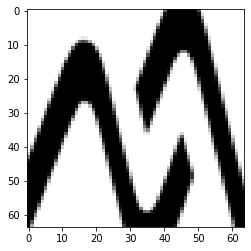

In [18]:
plt.imshow(x[100])

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))


model.add(Flatten())
model.add(Dense(units = 30, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
302/302 [==============================] - 2s 6ms/step - loss: 1.6932 - accuracy: 0.5033 - val_loss: 1.0988 - val_accuracy: 0.5921
Epoch 2/20
302/302 [==============================] - 2s 6ms/step - loss: 0.8793 - accuracy: 0.6722 - val_loss: 1.0228 - val_accuracy: 0.6382
Epoch 3/20
302/302 [==============================] - 2s 6ms/step - loss: 0.7398 - accuracy: 0.7086 - val_loss: 1.0864 - val_accuracy: 0.6184
Epoch 4/20
302/302 [==============================] - 2s 6ms/step - loss: 0.6956 - accuracy: 0.7566 - val_loss: 1.0168 - val_accuracy: 0.6447
Epoch 5/20
302/302 [==============================] - 2s 6ms/step - loss: 0.6425 - accuracy: 0.7649 - val_loss: 0.9390 - val_accuracy: 0.6776
Epoch 6/20
302/302 [==============================] - 2s 6ms/step - loss: 0.6289 - accuracy: 0.7583 - val_loss: 1.0924 - val_accuracy: 0.6645
Epoch 7/20
302/302 [==============================] - 2s 6ms/step - loss: 0.6070 - accuracy: 0.7583 - val_loss: 1.0965 - val_accuracy: 0.6579
Epoch 

In [20]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
284/284 [==============================] - 10s 5ms/step - loss: 1.6923 - accuracy: 0.5414 - val_loss: 0.2856 - val_accuracy: 0.8571
Epoch 2/2
284/284 [==============================] - 1s 4ms/step - loss: 0.1674 - accuracy: 0.9400 - val_loss: 0.3040 - val_accuracy: 0.8730
-> 1
Epoch 1/2
284/284 [==============================] - 1s 4ms/step - loss: 0.0933 - accuracy: 0.9665 - val_loss: 0.1434 - val_accuracy: 0.9206
Epoch 2/2
284/284 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9824 - val_loss: 0.1578 - val_accuracy: 0.9524
-> 2
Epoch 1/2
284/284 [==============================] - 1s 4ms/step - loss: 0.0474 - accuracy: 0.9788 - val_loss: 0.0241 - val_accuracy: 0.9841
Epoch 2/2
284/284 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9965 - val_loss: 0.0058 - val_accuracy: 1.0000
-> 3
Epoch 1/2
284/284 [==============================] - 1s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy:

In [25]:
model.save_weights("/content/drive/MyDrive/AKSARA/Model/Model_Bugis_FIX.h5")

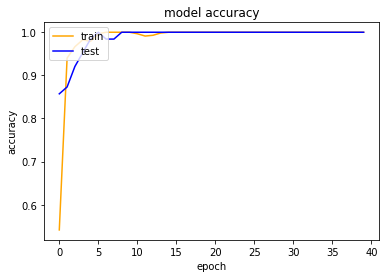

In [21]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

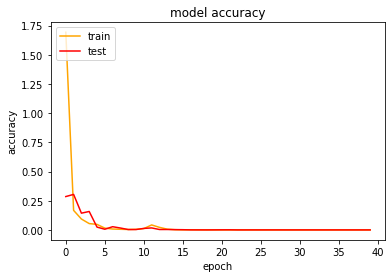

In [22]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

20/20 [==============================] - 0s 5ms/step
1.0
[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0 

In [ ]:
daftar_huruf[62]

'/content/drive/MyDrive/AKSARA/Jawa/JAVANESE_PADA_ADEG'

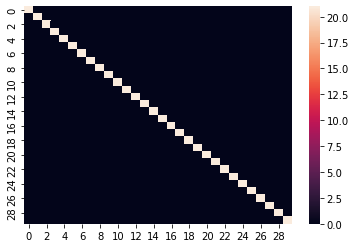

In [24]:
import seaborn as sns

sns.heatmap(cm)